<a href="https://colab.research.google.com/github/bryanMontoya/ml/blob/main/desicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV #Gridsearch para validacion cruzada para la profundidad óptima del conjunto de datos.
from sklearn.preprocessing import StandardScaler #Estandarizar los datos
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/ML-Modelos/data/'
pima = pd.read_csv(path + 'diabetes.csv')
pima = pima.set_axis(col_names, axis = 1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label
X.shape

(768, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)
scaler = StandardScaler() #Se estandarizan los dats de entrenamiento y esos valores se aplican a los datos de test.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #No se hace el fit, solo se usan los valores para estandarizar.

In [ ]:
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(tree_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(tree_model.score(X_test, y_test)))

Accuracy en entrenamiento: 0.80
Accuracy en test: 0.79


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  26]
 [ 15  51]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       126
           1       0.66      0.77      0.71        66

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.79      0.79       192



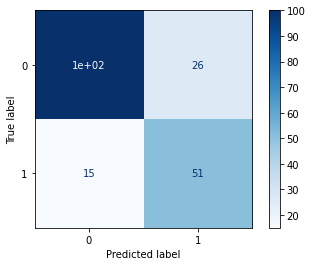

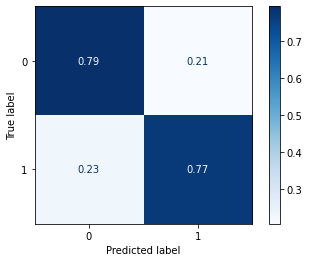

In [ ]:
plot_confusion_matrix(tree_model, X_test, y_test, cmap = 'Blues');
plot_confusion_matrix(tree_model, X_test, y_test, cmap = 'Blues', normalize = 'true');

(0.0, 1.005)

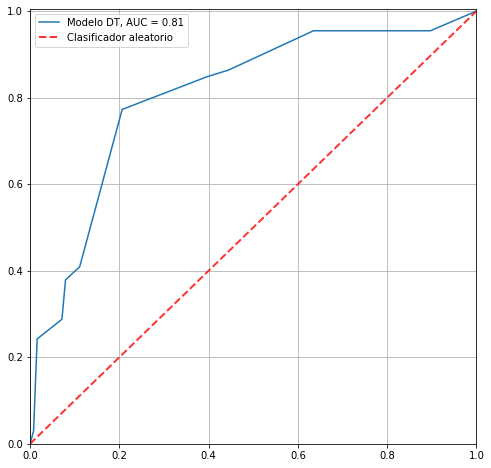

In [ ]:
plt.figure(figsize = (8,8))
y_pred_proba = tree_model.predict_proba(X_test)[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = 'Modelo DT, AUC = {:.2f}'.format(auc))
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = 'Clasificador aleatorio')
plt.grid()
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1.005])

Text(0, 0.5, 'Pedigree Function')

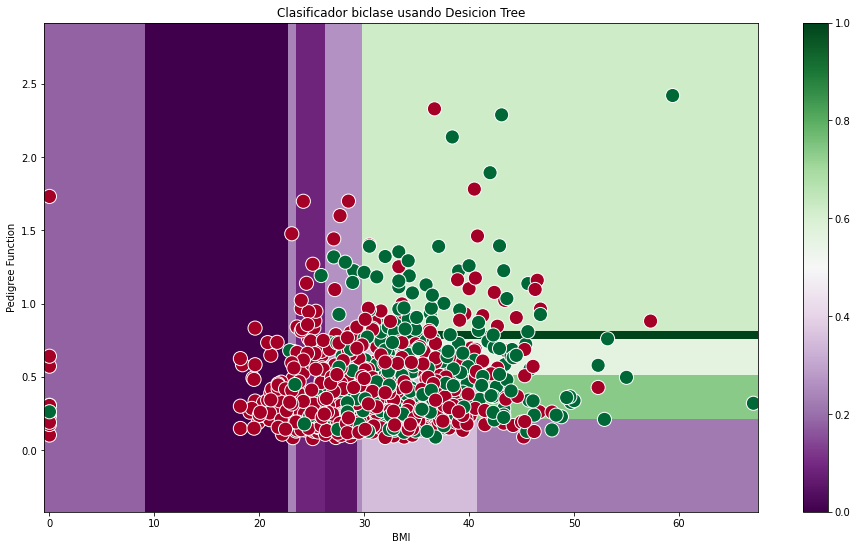

In [ ]:
X = pima[feature_cols].values
y = pima.label
h = 0.02 

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
clf.fit(X[:,[5,6]],y) 
x_min, x_max = X[:,5].min() - 0.5, X[:,5].max() + 0.5
y_min, y_max = X[:,6].min() - 0.5, X[:,6].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

plt.figure(figsize = (16,9))
plt.pcolormesh(xx,yy,Z,cmap = 'PRGn')
plt.colorbar();
plt.scatter(X[:,5],X[:,6], c = y, cmap = plt.cm.RdYlGn, edgecolor = 'w', s = 200)
plt.xlim([xx.min(), xx.max()])
plt.ylim([yy.min(), yy.max()])

plt.title('Clasificador biclase usando Desicion Tree')
plt.xlabel('BMI')
plt.ylabel('Pedigree Function')

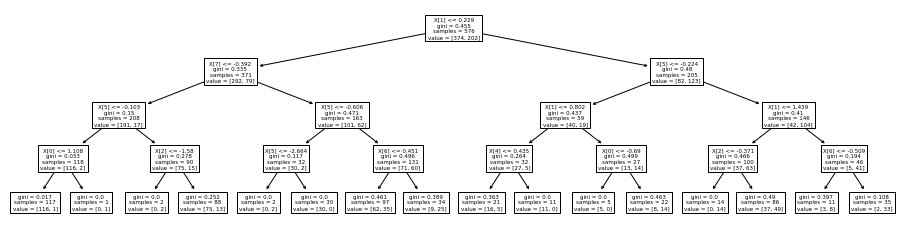

In [ ]:
from sklearn import tree
plt.figure(figsize = (16,4))
tree.plot_tree(tree_model)
plt.savefig('arbol.pdf', transparency = True)

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled = True, rounded = True, out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_pdf('arbol1.pdf')

True

In [ ]:
#Escoger la profundidad con validación cruzada.
tree_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
parameters = {'max_depth': range(3,8)}
clf = GridSearchCV(tree_model, param_grid = parameters, cv = 5) 
clf.fit(X_train, y_train)
print('El mejor hiperparámetro: ',clf.best_params_)
#No es necesario volver a entrenar el modelo.

El mejor hiperparámetro:  {'max_depth': 5}


In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy en entrenamiento: 0.85
Accuracy en test: 0.74
